# **Séries e Transformadas de Fourier**
---

### **Disciplina:** Sinais e Sistemas
### **Aluna:** Larissa Maciel Belarmino de Melo
---




**Aproximação de formas de onda usando harmônicos:** O artigo [Fourier Series and Harmonic Approximation](https://dspillustrations.com/pages/posts/misc/fourier-series-and-harmonic-approximation.html) traz alguns exemplos para verificação da série de Fourier para representação de sinais periódicos. Auxiliada pela referência [Serie_de_Fourier.pdf](https://drive.google.com/file/d/1BBq1NtsYCAiK8lIfcgk61TJTvWHRQaHT/view), explicarei os códigos implementados e os resultados obtidos no artigo;

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import scipy.signal as sig

  O artigo explora as origens da transformada de Fourier: a Série de Fourier. A série de Fourier toma um sinal periódico
𝑥
(
𝑡
)
 e o descreve como uma soma de ondas senoidais e cossenoidais. Notando que seno e cosseno são, por si só, funções periódicas, torna-se claro que
𝑥
(
𝑡
)
 também é uma função periódica.

Matematicamente, a série de Fourier é descrita da seguinte forma. Seja
𝑥
(
𝑡
)
 uma função periódica com período
𝑇
, ou seja,

𝑥
(
𝑡
)
=
𝑥
(
𝑡
+
𝑛
𝑇
)
,
𝑛
∈
𝑍
.

Então, podemos escrever
𝑥
(
𝑡
)
 como uma série de Fourier por

𝑥
(
𝑡
)
=
𝑎0/2
+
∑∞
𝑛
=
¹
(
𝑎𝑛
cos
⁡
(
2
𝜋
𝑛
𝑡/𝑇
)
+
𝑏𝑛
sin
⁡
(
2
𝜋
𝑛
𝑡/𝑇
)
)
,
onde
𝑎𝑛
​
  e
𝑏𝑛

​
  são os coeficientes da série de Fourier. Eles podem ser calculados por

𝑎𝑛
=
2/𝑇
∫𝑇
𝑥
(
𝑡
)
cos
⁡
(
2
𝜋
𝑛
𝑡/𝑇
)
𝑑𝑡
,

𝑏𝑛
=
2/𝑇
∫𝑇
𝑥
(
𝑡
)
sin
⁡
(
2
𝜋
𝑛
𝑡/𝑇
)
𝑑𝑡
.

Note que, para uma função com período
𝑇
, as frequências dos senos e cossenos são
1/𝑇
,
2/𝑇
,
3/𝑇
 ,…, ou seja, são múltiplos da frequência fundamental
1/𝑇
​
 , que é o inverso da duração do período da função. Portanto, a frequência
𝑛/𝑇

​
  é chamada de enésimo harmônico. O nome "harmônico" vem do fato de que, para o ouvido humano, frequências com razões inteiras soam "agradáveis", e as frequências são todas múltiplos inteiros da frequência fundamental.

No código seguinte é verificado o cálculo dos coeficientes de Fourier e a reconstrução da função numericamente. Primeiro, definimos algumas funções com período
𝑇
=
1
 que queremos expandir em uma série de Fourier.

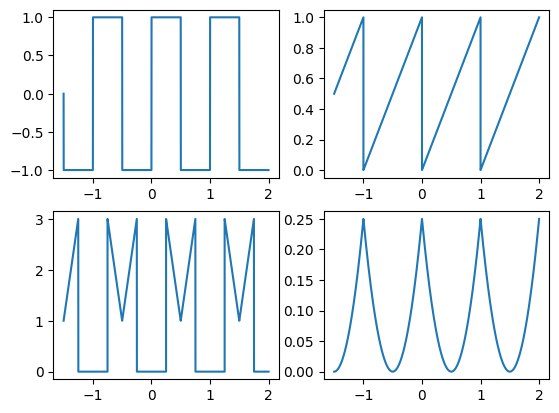

In [ ]:
Fs = 10000
func1 = lambda t: (abs((t%1)-0.25) < 0.25).astype(float) - (abs((t%1)-0.75) < 0.25).astype(float)
func2 = lambda t: t % 1
func3 = lambda t: (abs((t%1)-0.5) < 0.25).astype(float) + 8*(abs((t%1)-0.5)) * (abs((t%1)-0.5)<0.25)
func4 = lambda t: ((t%1)-0.5)**2
t = np.arange(-1.5, 2, 1/Fs)
plt.subplot(221); plt.plot(t, func1(t))
plt.subplot(222); plt.plot(t, func2(t))
plt.subplot(223); plt.plot(t, func3(t))
plt.subplot(224); plt.plot(t, func4(t))

O código acima cria quatro funções periódicas diferentes (quadrada, dente de serra, com picos e parábola).

*  O uso de `t % 1` garante que as funções sejam periódicas com período 1. Vamos detalhar cada uma:

* **func1:** Esta função gera uma forma de onda quadrada, onde ela vale 1 em uma parte do ciclo e -1 em outra. O `abs` e as comparações (`< 0.25` e `< 0.75`) são usados para criar o comportamento da onda.

* **func2:** Gera uma rampa periódica. A função
𝑡%1 produz um valor crescente de 0 a 1 repetidamente, criando uma onda dente de serra.

* **func3:** Gera uma onda com uma forma mais complexa. Ela tem picos no ponto médio (0.5), com uma elevação rápida seguida de uma decaída suave. A parte que usa `abs` ajusta a largura do pico e os multiplicadores controlam sua altura.

* **func4:** Gera uma parábola periódica centrada em 0.5, onde o valor de
`((𝑡%1)−0.5)²`
  faz com que o gráfico tenha uma forma de onda que cresce e decresce de forma quadrática ao longo de cada período.

  * **t = np.arange(-1.5, 2, 1/Fs):** Cria um vetor de tempo
𝑡 que varia de -1.5 a 2 com passos de
1/𝐹𝑠
 (que é o intervalo entre cada amostra, determinado pela taxa de amostragem).



A próxima função *`fourierSeries`* realiza o cálculo dos coeficientes da série de Fourier.

In [ ]:
def fourierSeries(period, N):
    """Calculate the Fourier series coefficients up to the Nth harmonic"""
    result = []
    T = len(period)
    t = np.arange(T)
    for n in range(N+1):
        an = 2/T*(period * np.cos(2*np.pi*n*t/T)).sum()
        bn = 2/T*(period * np.sin(2*np.pi*n*t/T)).sum()
        result.append((an, bn))
    return np.array(result)

E usa-a para calcular os coeficientes até a 20ª ordem para a primeira função:

<StemContainer object of 3 artists>

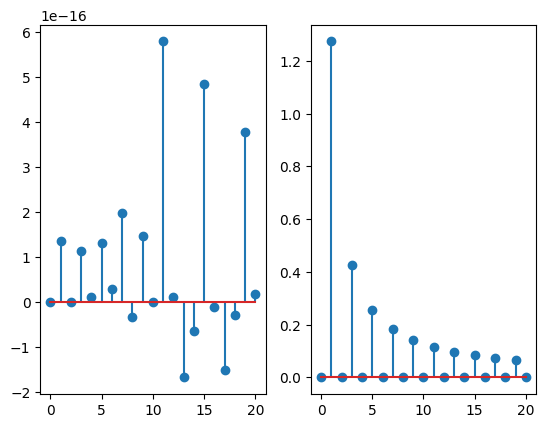

In [ ]:
t_period = np.arange(0, 1, 1/Fs)
F = fourierSeries(func1(t_period), 20)
plt.subplot(121); plt.stem(F[:,0])
plt.subplot(122); plt.stem(F[:,1])

Primeiro, vemos que 𝑎𝑛 = 0. A partir do gráfico da função 1, percebemos que ela é uma função ímpar, ou seja,
𝑥
(
𝑡
)
=
−
𝑥
(
−
𝑡
). Nesse caso, a série de Fourier contém apenas funções ímpares, que são exclusivamente os termos que incluem os senos (já que
sin
⁡
(
𝑥
)
=
−
sin
⁡
(
−
𝑥
)). Segundo, os coeficientes de Fourier
𝑏𝑛 decaem lentamente com a velocidade
1
/
𝑛, e a cada 2º coeficiente
𝑏𝑛 é zero. Podemos explicar isso relacionando com o conhecimento da Transformada de Fourier: a função é a soma de duas funções retangulares com largura de **1/2** segundos. Sabemos que a transformada de Fourier de um retângulo assim é uma função sinc, que tem zeros a uma distância de 2 Hz. Além disso, a magnitude da função sinc decai com **1/𝑓**. Isso está muito alinhado com os coeficientes obtidos: eles decaem com **1/𝑛**, e a cada 2º valor é zero.

Agora, vamos olhar para a reconstrução do sinal, ou seja, calcular
𝑥
(
𝑡
) a partir de seus coeficientes da série de Fourier até uma determinada ordem. A função `reconstruct` faz isso:

In [ ]:
def reconstruct(P, anbn):
    result = 0
    t = np.arange(P)
    for n, (a, b) in enumerate(anbn):
        if n == 0:
            a = a/2
        result = result + a*np.cos(2*np.pi*n*t/P) + b * np.sin(2*np.pi*n*t/P)
    return result

Esse é o sinal reconstruído para a função retangular até o 20º harmônico:

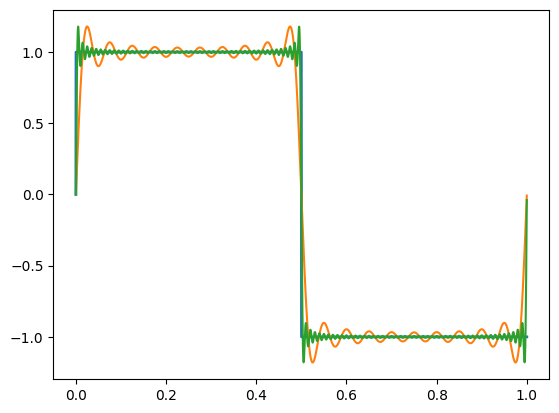

In [ ]:
F = fourierSeries(func1(t_period), 100)
plt.plot(t_period, func1(t_period), label='Original', lw=2)
plt.plot(t_period, reconstruct(len(t_period), F[:20,:]), label='Reconstructed with 20 Harmonics');
plt.plot(t_period, reconstruct(len(t_period), F[:100,:]), label='Reconstructed with 100 Harmonics');

Como podemos ver, o sinal reconstruído segue aproximadamente o original, e quanto mais harmônicos são usados, melhor a aproximação. No entanto, também observamos que, especialmente na região do salto em 𝑡 = 0.5, o sinal reconstruído não é exato. Em vez disso, o sinal reconstruído oscila significativamente nessa posição. Esse fenômeno é chamado de Fenômeno de `Gibbs` e descreve o fato de que a série de Fourier apresenta grandes oscilações em torno de descontinuidades de salto. Em particular, a altura das oscilações acima ou abaixo do valor correto não depende do número de harmônicos e é aproximadamente 9% da altura do salto. No entanto, a duração das oscilações diminui com o número de harmônicos, eventualmente levando a uma aproximação correta no limite de infinitos harmônicos.

Agora, o artigo nos mostra a Série de Fourier de algumas funções e como sua aproximação pela série de Fourier aparece para diferentes números de harmônicos:

In [ ]:
def showHarmonics(period, N):
    """Calculate the Fourier Series up to N harmonics, and show the reconstructed signal."""
    F = fourierSeries(period, N+1)
    plt.subplot(231); plt.stem(F[:,0])
    plt.subplot(234); plt.stem(F[:,1])
    plt.subplot(132)
    T = len(period)
    t = np.arange(T)/T
    result = 0
    for n, (an, bn) in enumerate(F):
        if n == 0:
            an = an/2
        cos_part = an*np.cos(2*np.pi*n*t)
        sin_part = bn*np.sin(2*np.pi*n*t)
        plt.plot(t, cos_part)
        plt.plot(t, sin_part)
        result = result + cos_part + sin_part
    plt.subplot(133)
    t2 = np.arange(2*T)/T
    plt.plot(t2, np.tile(period, 2))
    plt.plot(t2, np.tile(result, 2))

In [ ]:
from IPython.display import Video

Video('download.mp4', embed=True)

Primeiro, vemos novamente a função retangular. Com o aumento do número de harmônicos, percebemos que a aproximação do retângulo melhora. No entanto, também observamos que a quantidade de oscilações acima do valor correto na descontinuidade de salto permanece constante, independentemente do número de harmônicos.

In [ ]:
from IPython.display import Video

Video('download (1).mp4', embed=True)

A seguir está a função de rampa linear periódica. Novamente, vemos que a quantidade de oscilações acima do valor correto na descontinuidade é independente do número de harmônicos. No entanto, a duração das oscilações se torna mais curta e, em geral, a aproximação melhora com mais harmônicos. Além disso, exceto pelo componente DC
𝑎
0
 , todos os coeficientes
𝑎𝑛
=
0
. Isso se deve novamente ao fato de que a função é ímpar, ou seja, temos
𝑥
(
𝑡
)
=
1
−
𝑥
(
−
𝑡
)
. Portanto, apenas os componentes para a onda senoidal são não nulos.

In [ ]:
from IPython.display import Video

Video('download (2).mp4', embed=True)

A terceira função parece mais complicada, pois tem mais saltos e é, em geral, mais irregular do que as funções anteriores. De fato, há uma quantidade significativa de oscilações acima do valor correto na parte inferior do gráfico, que diminui muito lentamente com mais harmônicos. Isso vem da alta quantidade de descontinuidades da função. A função é uma função par, ou seja,
𝑥
(
𝑡
)
=
𝑥
(
−
𝑡
). Portanto, todos os
𝑏𝑛
=
0
, que correspondem à contribuição das ondas senoidais. Em vez disso, apenas as ondas cossenoidais, que são funções pares, compõem a série de Fourier geral.








In [ ]:
from IPython.display import Video

Video('download (3).mp4', embed=True)

Por fim, damos uma olhada na função parabólica periódica. Primeiro, reconhecemos que a função é bem aproximada com apenas alguns harmônicos. Podemos explicar isso pela suavidade geral da função, que não possui descontinuidades. Além disso, novamente identificamos que
𝑏𝑛
=
0, uma vez que
𝑥
(
𝑡
)
é uma função par, ou seja,
𝑥
(
𝑡
)
=
𝑥
(
−
𝑡
).